### Data Cleaning
Performed in original excel data file
- Cleaned data with 4 and 6 letters. rprobe -> probe, tash -> trash, clen -> clean
- Removed extra spaces.
- Adjusted Mar 27th 2022 data. Sum before adjustment was 126%. After adjustment, it is 100%.


In [ ]:
# read initial xlsx
import os
import pandas as pd
if (os.path.exists("Problem_C_Data_Wordle_with_freq.xlsx")):
    xls = pd.ExcelFile('Problem_C_Data_Wordle_with_freq.xlsx')
    df = xls.parse('Sheet1')
    print(df.head())
    print("File loaded")
    print(df.columns)
else:
    xls = pd.ExcelFile('Problem_C_Data_Wordle.xlsx')
    df = xls.parse('Sheet1')
    words = df["Word"]
    words = words.str.lower()

    word_frequency = [M(word, 'en') for word in words]

    df["Word Frequency"] = word_frequency

    df.to_excel("Problem_C_Data_Wordle_with_freq.xlsx", index=False)

    print("Sheet with freq created")
    print(df.head())
    print("File loaded")

# print(df.head())

        Date  Contest number   Word  Number of  reported results  \
0 2022-12-31             560  manly                        20380   
1 2022-12-30             559  molar                        21204   
2 2022-12-29             558  havoc                        20001   
3 2022-12-28             557  impel                        20160   
4 2022-12-27             556  condo                        20879   

   Number in hard mode  1 try  2 tries  3 tries  4 tries  5 tries  6 tries  \
0                 1899      0        2       17       37       29       12   
1                 1973      0        4       21       38       26        9   
2                 1919      0        2       16       38       30       12   
3                 1937      0        3       21       40       25        9   
4                 2012      0        2       17       35       29       14   

   7 or more tries (X)  Word Frequency  
0                    2    4.570000e-06  
1                    1    9.770000e-07  

/var/folders/9x/5z4ktp1n3zl3cbqyzlvr394r0000gn/T/ipykernel_49444/1220266609.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0202020202020203' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  try_2[i] = try_2[i] * scale
/var/folders/9x/5z4ktp1n3zl3cbqyzlvr394r0000gn/T/ipykernel_49444/1220266609.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17.171717171717173' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  try_3[i] = try_3[i] * scale
/var/folders/9x/5z4ktp1n3zl3cbqyzlvr394r0000gn/T/ipykernel_49444/1220266609.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.292929292929294' has dtype incompatible with int64, please explicitly cast to a compati

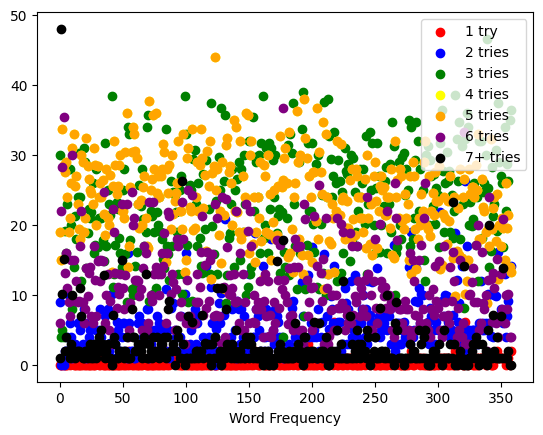

In [3]:
import matplotlib.pyplot as plt
import numpy as np

df = df.sort_values(by="Word Frequency")

word_freq = df["Word Frequency"]

word_frequency = df["Word Frequency"]

# normalize word frequency min-max
word_freq = (word_freq - word_freq.min()) / (word_freq.max() - word_freq.min())

try_1 = df["1 try"].copy()
try_2 = df["2 tries"].copy()
try_3 = df["3 tries"].copy()
try_4 = df["4 tries"].copy()
try_5 = df["5 tries"].copy()
try_6 = df["6 tries"].copy()
try_7 = df["7 or more tries (X)"].copy()

for i in range(len(try_7)):
    sum = try_1[i] + try_2[i] + try_3[i] + try_4[i] + try_5[i] + try_6[i] + try_7[i]
    scale = 100 / sum
    try_1[i] = try_1[i] * scale
    try_2[i] = try_2[i] * scale
    try_3[i] = try_3[i] * scale
    try_5[i] = try_5[i] * scale
    try_5[i] = try_5[i] * scale
    try_6[i] = try_6[i] * scale
    try_7[i] = try_7[i] * scale

try_less_than_4 = try_1 + try_2 + try_3
try_greater_than_4 = try_5 + try_5 + try_6

# plt.scatter(word_freq, try_less_than_4, color='red', label='1 - 3 tries')
# plt.scatter(word_freq, try_greater_than_4, color='blue', label='4 - 6 tries')
# plt.scatter(word_freq, try_7, color='green', label='7+ tries')

plt.scatter(range(len(try_1)), try_1, color='red', label='1 try')
plt.scatter(range(len(try_2)), try_2, color='blue', label='2 tries')
plt.scatter(range(len(try_3)), try_3, color='green', label='3 tries')
plt.scatter(range(len(try_5)), try_5, color='yellow', label='4 tries')
plt.scatter(range(len(try_5)), try_5, color='orange', label='5 tries')
plt.scatter(range(len(try_6)), try_6, color='purple', label='6 tries')
plt.scatter(range(len(try_7)), try_7, color='black', label='7+ tries')



plt.xlabel('Word Frequency')
plt.legend()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint

def logistic_derivative(x, t, k, r):
    return r * x * (1 - x / k)

def integrated_logistic(t, k, r, x0):
    # Solve the ODE using odeint
    result = odeint(logistic_derivative, x0, t, args=(k, r))
    return result.flatten()

def logistic_fit(t, k, r, x0):
    return integrated_logistic(t, k, r, x0)

/Users/yuhengding/opt/anaconda3/envs/math_model/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/9x/5z4ktp1n3zl3cbqyzlvr394r0000gn/T/ipykernel_49444/1393801385.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x), try_less_than_4_y, color='red', label='Model with carrying capacity k = {:.2f}, growth rate r = {:.2f}'.format(*try_less_than_4_params))


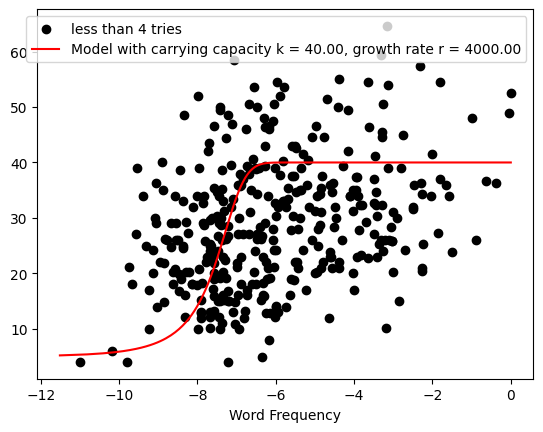

In [5]:
x = np.linspace(0, 1, 100000)

try_less_than_4 = try_1 + try_2 + try_3

try_less_than_4_params = [40, 4000, 5]

try_less_than_4_y = logistic_fit(x, *try_less_than_4_params)

# Plot data and model
plt.scatter(np.log(word_freq), try_less_than_4, color='black', label='less than 4 tries')
plt.plot(np.log(x), try_less_than_4_y, color='red', label='Model with carrying capacity k = {:.2f}, growth rate r = {:.2f}'.format(*try_less_than_4_params))

plt.xlabel('Word Frequency')
plt.legend()

/var/folders/9x/5z4ktp1n3zl3cbqyzlvr394r0000gn/T/ipykernel_49444/3469405175.py:29: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x), try_greater_or_equal_than_4_y, color='red', label='Model with carrying capacity k = {:.2f}, growth rate r = {:.2f}'.format(*try_greater_or_equal_than_4_params))


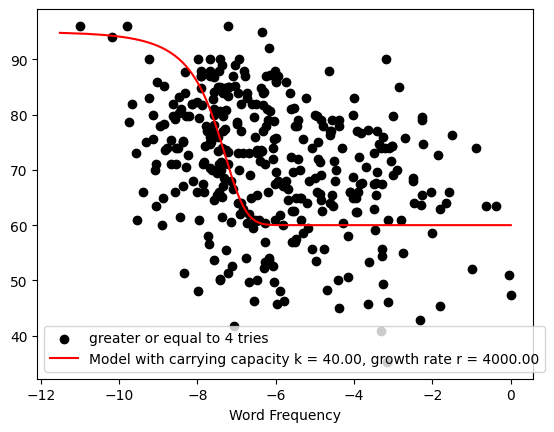

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint

def logistic_derivative(x, t, k, r):
    return r * x * (1 - x / k)

def integrated_logistic(t, k, r, x0):
    # Solve the ODE using odeint
    result = odeint(logistic_derivative, x0, t, args=(k, r))
    return result.flatten()

def logistic_fit(t, k, r, x0):
    return 100 - integrated_logistic(t, k, r, x0)

x = np.linspace(0, 1, 100000)

try_greater_or_equal_than_4 = try_4 + try_5 + try_6 + try_7

# Fit logistic growth model to data

try_greater_or_equal_than_4_params = [40, 4000, 5]

try_greater_or_equal_than_4_y = logistic_fit(x, *try_greater_or_equal_than_4_params)

# Plot data and model
plt.scatter(np.log(word_freq), try_greater_or_equal_than_4, color='black', label='greater or equal to 4 tries')
plt.plot(np.log(x), try_greater_or_equal_than_4_y, color='red', label='Model with carrying capacity k = {:.2f}, growth rate r = {:.2f}'.format(*try_greater_or_equal_than_4_params))

plt.xlabel('Word Frequency')
plt.legend()

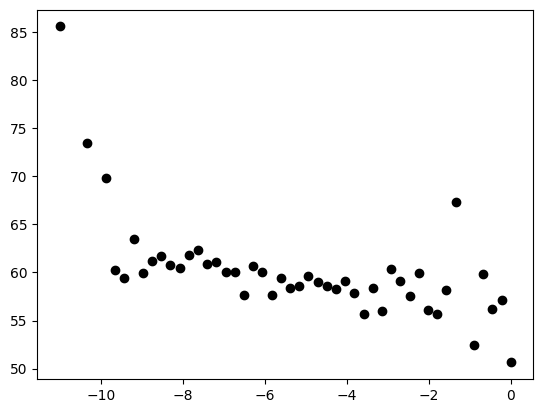

In [7]:
word_frequency = df["Word Frequency"]

weighted_avg = (try_1 + 2 * try_2 + 3 * try_3 + 4 * try_4 + 5 * try_5 + 6 * try_6 + 7 * try_7) / 7

skipped = []

word_frequency = word_frequency.to_numpy()

weighted_avg = weighted_avg.to_numpy()

# word_frequency = np.log(word_frequency)

word_frequency = (word_frequency - word_frequency.min()) / (word_frequency.max() - word_frequency.min())

for i in range(len(word_frequency)):
    if word_frequency[i] == 0:
        skipped.append(i)

word_frequency = np.delete(word_frequency, skipped)

weighted_avg = np.delete(weighted_avg, skipped)

word_frequency = np.log(word_frequency)

freq_min, freq_max = word_frequency.min(), word_frequency.max()

num_bins = 50

bins = np.linspace(freq_min, freq_max, num_bins)

binned_avg = np.zeros(num_bins)

binned_count = np.zeros(num_bins)

# print(bins)

for i in range(len(word_frequency)):

    bin = int((word_frequency[i] - freq_min) / (freq_max - freq_min) * num_bins)

    if bin == num_bins:
        bin -= 1

    binned_avg[bin] += weighted_avg[i]
    binned_count[bin] += 1

for i in range(num_bins):
    if binned_count[i] != 0:
        binned_avg[i] /= binned_count[i]

    if binned_avg[i] == 0:
        binned_avg[i] = None

# remove outliers

plt.scatter(bins, binned_avg, color='black', label='binned average')

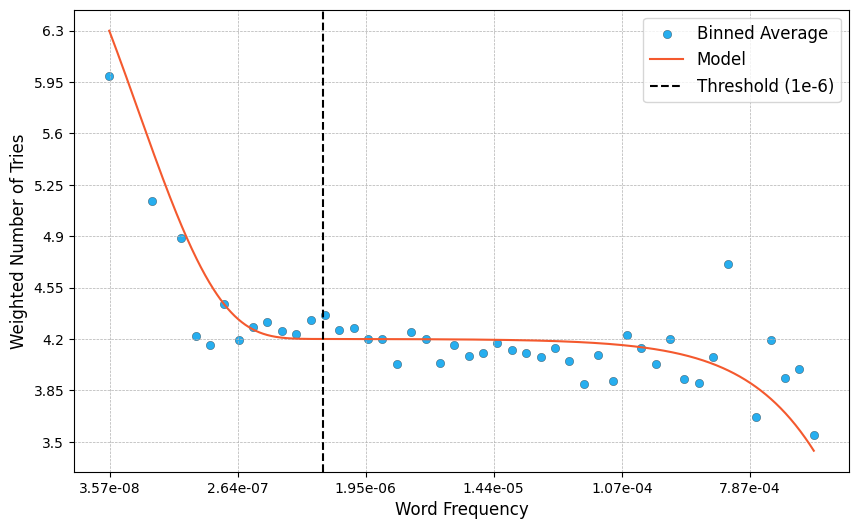

In [116]:
def logistic_derivative(x, t, k, r, decay):

    if np.log(t) < -7.668561108015897: # 1e-6
        return r * x * (1 - x / k)
    else:
        return -decay * x

def integrated_logistic(t, k, r, decay, x0):
    # Solve the ODE using odeint
    result = odeint(logistic_derivative, x0, t, args=(k, r, decay))
    return result.flatten()

def logistic_fit(t, k, r, decay, x0):
    return integrated_logistic(t, k, r, decay, x0)

x = np.linspace(freq_min, freq_max, 1000) # 0 to 1 after exp

params = [60, 22000, 0.2, 90]

# params = [60, 9000, 0.5]

# y = logistic_fit(x, *params)
y = logistic_fit(np.exp(x), *params)

plt.figure(figsize=(10, 6))

freq = df["Word Frequency"]

tick_labels = np.arange(-11, 1, 2)

tick_labels = np.exp(tick_labels)

threshold = 1e-6

threshold = (threshold - freq.min()) / (freq.max() - freq.min())

threshold = np.log(threshold)

plt.scatter(bins, binned_avg, color='#27aeef', label='Binned Average', linewidths=0.2, edgecolors='black')
plt.plot(x, y, color='#f4592e', label='Model', )
plt.axvline(x=threshold, color='black', linestyle='--', label = 'Threshold (1e-6)')

plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Word Frequency', fontsize=12)
plt.ylabel("Weighted Number of Tries", fontsize=12)
plt.legend(fontsize=12, loc='upper right')

tick_labels = [i * (freq.max() - freq.min()) + freq.min() for i in tick_labels]

# use scientific notation
tick_labels = ["{:.2e}".format(i) for i in tick_labels]

plt.xticks(ticks = np.arange(-11, 1, 2), labels = tick_labels)
plt.yticks(ticks = np.arange(50, 95, 5), labels = np.arange(50, 95, 5) * 7 / 100)

plt.savefig("model.png", dpi=500, bbox_inches='tight')

([<matplotlib.axis.XTick at 0x143a8c2b0>,
 [Text(0, 0, 'Jan'),
  Text(31, 0, 'Feb'),
  Text(62, 0, 'Mar'),
  Text(93, 0, 'Apr'),
  Text(124, 0, 'May'),
  Text(155, 0, 'Jun'),
  Text(186, 0, 'Jul'),
  Text(217, 0, 'Aug'),
  Text(248, 0, 'Sep'),
  Text(279, 0, 'Oct'),
  Text(310, 0, 'Nov'),
  Text(341, 0, 'Dec')])

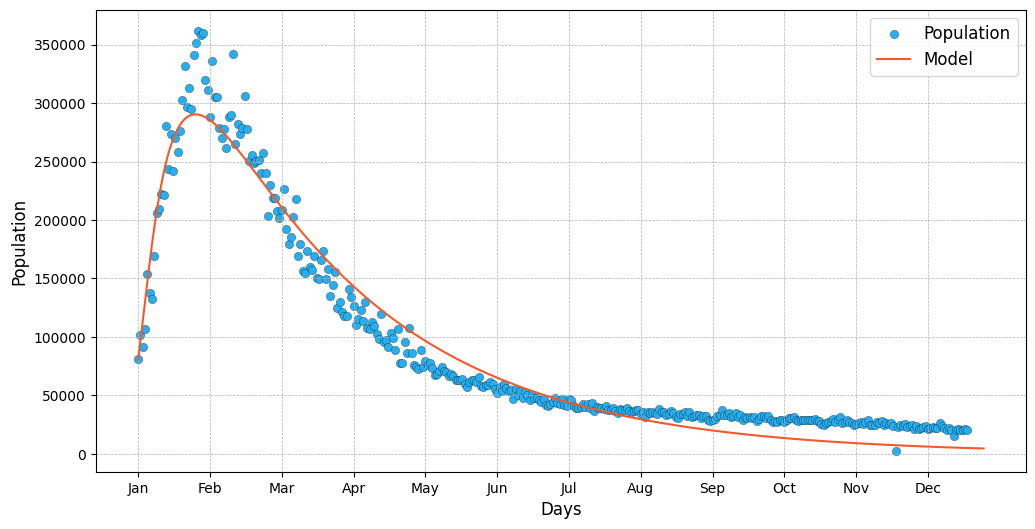

In [ ]:
xls = pd.ExcelFile('Problem_C_Data_Wordle.xlsx')
df = xls.parse('Sheet1')

population = df["Number of  reported results"]

population = population.to_numpy()

# reverse population
population = population[::-1]

def derivative(x, t, beta, gemma):
    beta = beta * np.exp(-0.085 * t)
    gemma = gemma

    return beta * x * (1 - x / N) - gemma * x

def integrated(t, beta, gemma, x0):
    result = odeint(derivative, x0, t, args=(beta, gemma))
    return result.flatten()

def fit(t, beta, gemma, x0):
    return integrated(t, beta, gemma, x0)

N = 500000

initial_params = [0.25, 0.013, 80630]

# [ 0.26449721,  0.01688346, -0.08412822,  0.82314264]

x = np.linspace(0, 365, 1000)

y = fit(x, *initial_params)

plt.figure(figsize=(12, 6))

plt.scatter(range(len(population)), population, color='#27aeef', label='Population', linewidths=0.2, edgecolors='black')
plt.plot(x, y, color='#f4592e', label='Model')

plt.grid(linestyle='--', linewidth=0.5)
plt.title('Number of Daily Wordle Players')
plt.xlabel('Date', fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend(fontsize=12, loc='upper right')

plt.xticks(ticks = np.arange(0, 365, 31), labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
